In [1]:
import scanpy as sc
import os
import pandas as pd
import decoupler as dc
import matplotlib.pyplot as plt

In [2]:
if 'snakemake' in locals():
    adata_fp = snakemake.input[0]
    CT_sig_fp = snakemake.input[1]
    c2l = snakemake.output[0]
    dc = snakemake.output[1]
else:
    adata_fp = '../../../data/merged.h5ad'
    CT_sig_fp = '../../../data/integrated/plate_scores_cell_subtype.csv'

In [3]:
adata = sc.read_h5ad(adata_fp)

In [5]:
# adata.obs[adata.uns['mod']['factor_names']] = adata.obsm['q05_cell_abundance_w_sf']

prop = adata.obsm['q05_cell_abundance_w_sf']
adata.obs[adata.uns['mod']['factor_names']] = prop.div(prop.sum(axis=1), axis = 0)

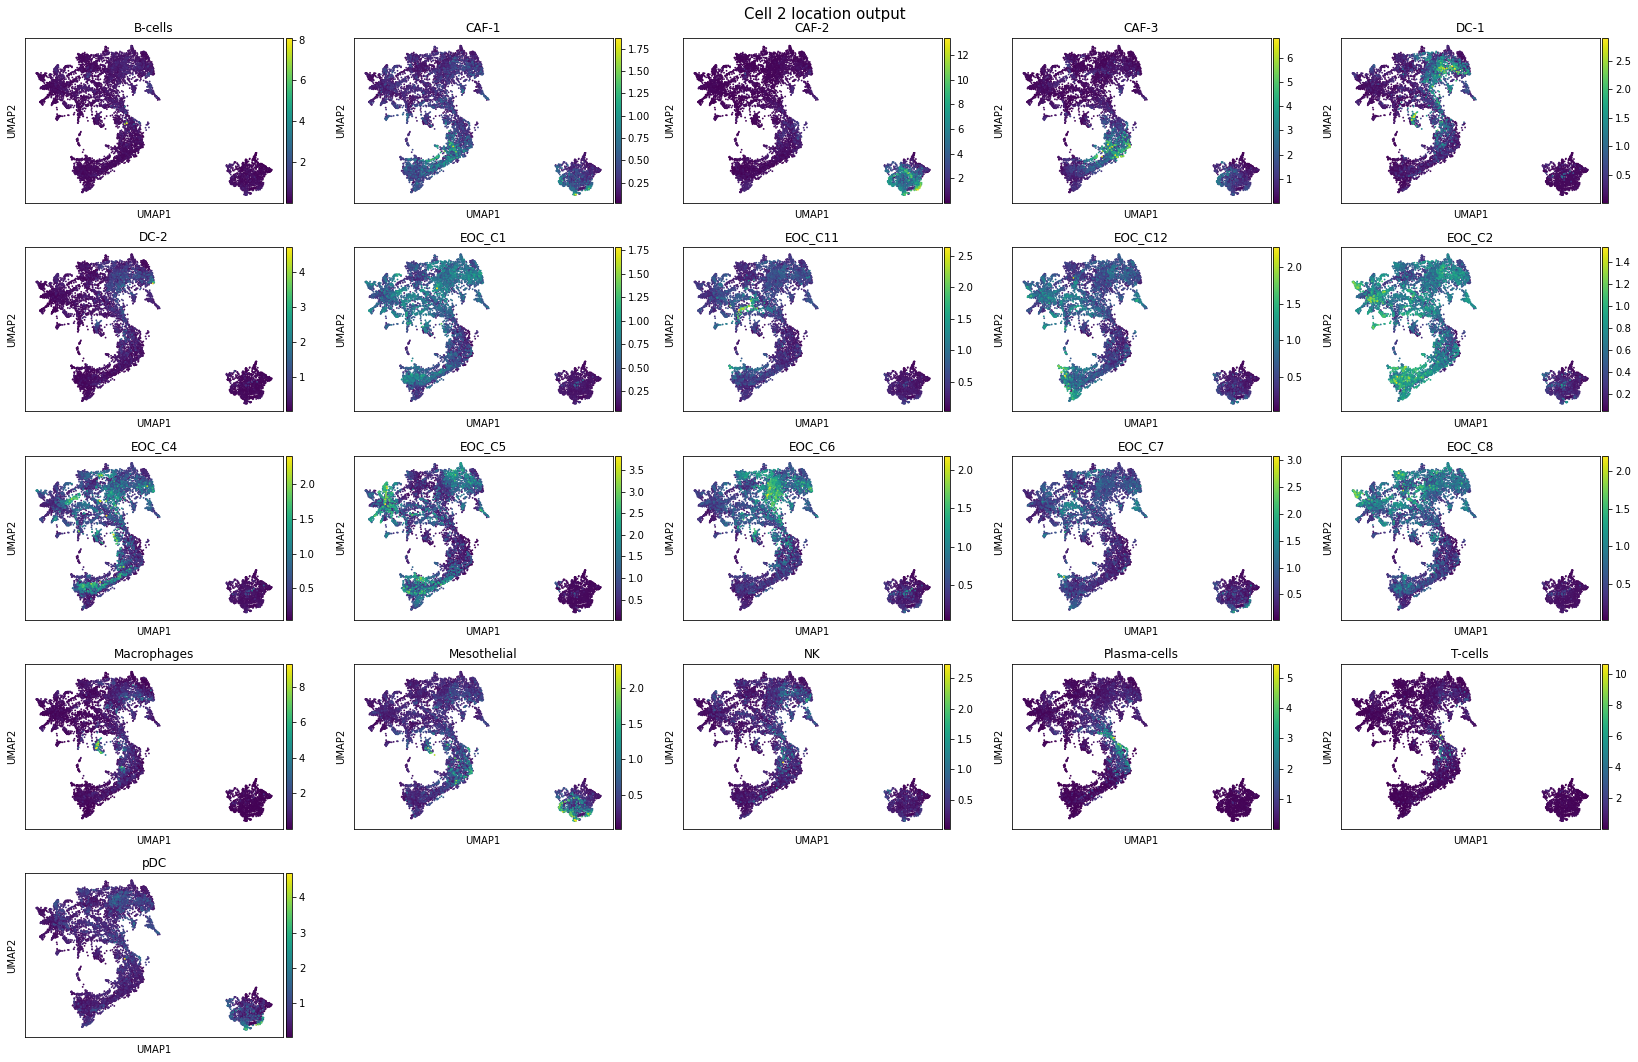

In [39]:
fig, axs = plt.subplots(5, 5, figsize=(23, 15))
axs = axs.flatten()

for ax, CT in zip(axs, sorted(adata.uns['mod']['factor_names'])):

    sc.pl.umap(adata, color = CT, ax = ax, show = False)

for ax in axs[len(adata.uns['mod']['factor_names']):]:
    ax.set_axis_off()

plt.suptitle('Cell 2 location proportions', fontsize = 15)
plt.tight_layout()

if 'snakemake' in locals():
    plt.savefig(c2l, dpi = 300)

In [27]:
df = pd.read_csv(CT_sig_fp, index_col=0)
df.index = ['TMA' + cell[1] + '_' + cell[0] + '-1' for cell in df.index.str.split('-')]
df = df.loc[adata.obs.index]

B-cells     CAF-1     CAF-2     CAF-3      DC-1  \
TMA1_AAACAAGTATCTCCCA-1  0.391618  1.667965  1.503215  1.570920  0.374676   
TMA1_AAACAGAGCGACTCCT-1 -0.714923 -1.546323 -1.437912 -1.517074 -0.593485   
TMA1_AAACAGCTTTCAGAAG-1 -0.752887 -1.299294 -1.075989 -1.439331 -0.972979   
TMA1_AAACAGGGTCTATATT-1 -0.813466 -1.277339 -1.334982 -1.844862  0.752142   
TMA1_AAACATTTCCCGGATT-1  0.247585  0.702523  2.055579  1.121283  0.068256   
...                           ...       ...       ...       ...       ...   
TMA4_TTGTTAGCAAATTCGA-1  0.003042 -0.349644 -1.452920 -1.762727  0.413936   
TMA4_TTGTTCAGTGTGCTAC-1 -0.437514 -0.924898 -1.668189 -2.401403  0.524832   
TMA4_TTGTTCTAGATACGCT-1  0.319770  0.670820  0.379305  0.547476 -0.015037   
TMA4_TTGTTGGCAATGACTG-1 -0.073571 -1.107647 -1.049530 -2.700198 -0.420141   
TMA4_TTGTTTCCATACAACT-1 -0.106472  0.892485  0.156950  1.328095  0.448396   

                             DC-2    EOC_C1   EOC_C11   EOC_C12    EOC_C2  \
TMA1_AAACAAGTATCTCCCA-1  0.065860 -1.056356 -1.228944 -0.873158 -0.387901   
TMA1_AAACAGAGCGACTCCT-1 -0.122085  0.265624  1.140192  1.426444  0.067760   
TMA1_AAACAGCTTTCAGAAG-1 -0.886828  0.080014  1.760665  0.721550  0.994425   
TMA1_AAACAGGGTCTATATT-1 -1.194179  0.547269  1.188598  1.509290  0.429415   
TMA1_AAACATTTCCCGGATT-1 -0.075884 -1.180665 -1.128131 -1.473332 -0.317563   
...                           ...       ...       ...       ...       ...   
TMA4_TTGTTAGCAAATTCGA-1  1.195928  2.112457  0.262968 -0.827953 -0.012715   
TMA4_TTGTTCAGTGTGCTAC-1 -0.280632  0.761786  0.998153  1.258212  0.928063   
TMA4_TTGTTCTAGATACGCT-1  0.368309 -1.127189 -0.385788 -0.829634  0.527975   
TMA4_TTGTTGGCAATGACTG-1  0.292314  0.404915 -0.002289  2.162306 -0.515305   
TMA4_TTGTTTCCATACAACT-1  0.213783 -0.858996 -1.759402 -1.186739 -1.188959   

                         ...    EOC_C5    EOC_C6    EOC_C7    EOC_C8  \
TMA1_AAACAAGTATCTCCCA-1  ... -0.688829 -0.365035 -0.739252 -1.148900   
TMA1_AAACAGAGCGACTCCT-1  ...  0.389977  0.281948  0.415949  1.922969   
TMA1_AAACAGCTTTCAGAAG-1  ...  0.392370  0.051805  1.090100  0.746541   
TMA1_AAACAGGGTCTATATT-1  ... -0.267576  0.359819 -0.992396  1.059839   
TMA1_AAACATTTCCCGGATT-1  ... -0.820872 -1.290463 -0.082697 -1.942796   
...                      ...       ...       ...       ...       ...   
TMA4_TTGTTAGCAAATTCGA-1  ... -1.353601 -0.375484  0.380742  1.379089   
TMA4_TTGTTCAGTGTGCTAC-1  ...  0.735230 -0.266841  0.671300  1.472893   
TMA4_TTGTTCTAGATACGCT-1  ... -0.436471  0.717463 -1.021134 -1.777322   
TMA4_TTGTTGGCAATGACTG-1  ...  0.685915  0.071095 -0.874008  0.315429   
TMA4_TTGTTTCCATACAACT-1  ... -0.621961 -0.209984 -0.148071 -1.675065   

                         Macrophages  Mesothelial        NK  Plasma-cells  \
TMA1_AAACAAGTATCTCCCA-1     0.770928     1.104559  0.881719      0.199753   
TMA1_AAACAGAGCGACTCCT-1    -0.893925    -0.806571 -0.710113     -0.691293   
TMA1_AAACAGCTTTCAGAAG-1    -0.861328    -0.878998 -0.600514      0.347241   
TMA1_AAACAGGGTCTATATT-1    -0.689805    -0.242493 -0.274463     -0.276532   
TMA1_AAACATTTCCCGGATT-1    -0.076401     0.613112  0.286214     -0.267497   
...                              ...          ...       ...           ...   
TMA4_TTGTTAGCAAATTCGA-1     1.022425    -1.218787  0.325335     -0.091390   
TMA4_TTGTTCAGTGTGCTAC-1    -0.410710    -0.993757 -0.131517     -0.096790   
TMA4_TTGTTCTAGATACGCT-1     0.241565     0.330393  0.808820      2.929416   
TMA4_TTGTTGGCAATGACTG-1    -0.908190    -1.178020 -0.535446     -1.020883   
TMA4_TTGTTTCCATACAACT-1     1.300575     1.153742  1.290039     -0.944622   

                          T-cells       pDC  
TMA1_AAACAAGTATCTCCCA-1  1.004240  0.228369  
TMA1_AAACAGAGCGACTCCT-1 -0.750187 -0.931100  
TMA1_AAACAGCTTTCAGAAG-1 -0.638181  0.486211  
TMA1_AAACAGGGTCTATATT-1 -0.923059  1.262055  
TMA1_AAACATTTCCCGGATT-1 -0.180733 -0.125240  
...                           ...       ...  
TMA4_TTGTTAGCAAATTCGA-1 -0.082951  0.129148  
TMA4_TTGTTCAGTGTGC

In [30]:
adata.obs['DC_' + df.columns] = df

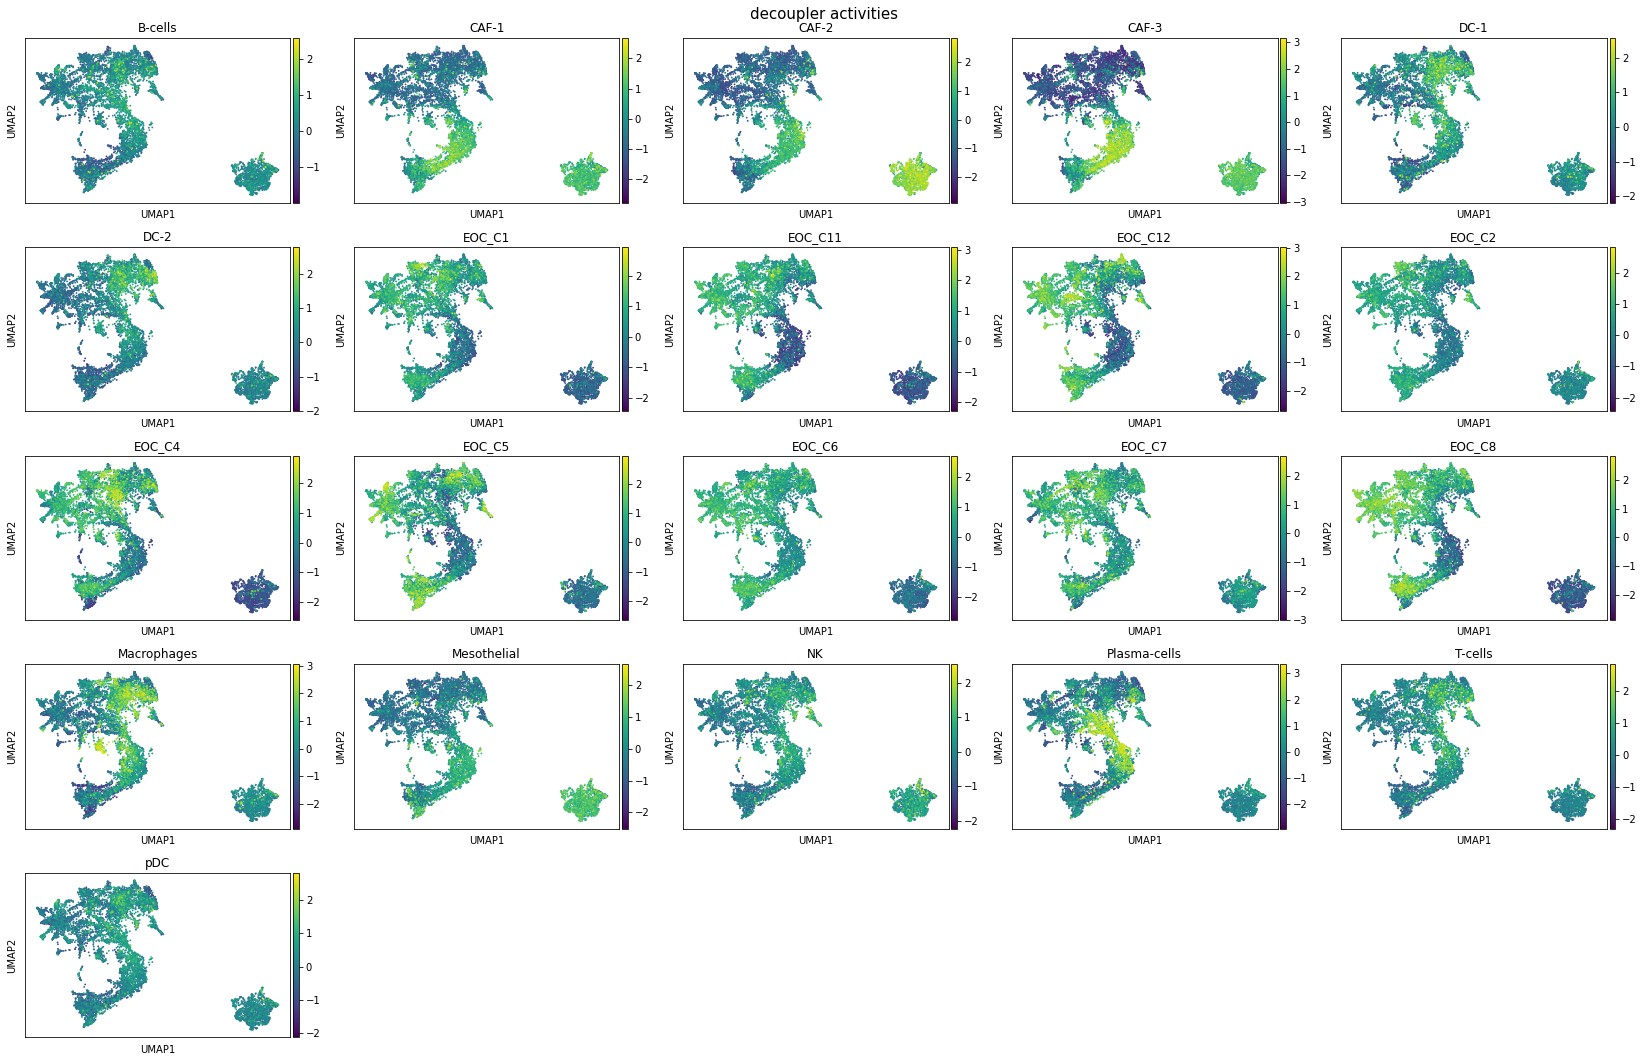

In [41]:
fig, axs = plt.subplots(5, 5, figsize=(23, 15))
axs = axs.flatten()

for ax, CT in zip(axs, sorted(df.columns)):

    sc.pl.umap(adata, color = 'DC_' + CT, ax = ax, show = False)
    ax.set_title(CT)

for ax in axs[len(df.columns):]:
    ax.set_axis_off()

plt.suptitle('decoupler activities', fontsize = 15)
plt.tight_layout()
if 'snakemake' in locals():
    plt.savefig(dc, dpi = 300)

In [6]:
adata

AnnData object with n_obs × n_vars = 9129 × 5559
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'Sample', 'plate', 'Confidence', 'PFI', 'patient', 'annotation_manual', 'B.cells_UCell', 'Cancer.cells_UCell', 'Dendritic.cells_UCell', 'Endothelial.cells_UCell', 'Fibroblasts_UCell', 'Meyloid.cells_UCell', 'T.cells_UCell', 'Ovarian.stromal.cells_UCell', 'Naturall.Killer.cells_UCell', 'Mast.cells_UCell', 'cell_type', 'seurat_clusters_old', 'PFI_confidence', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'in_tissue', 'array_row', 'array_col', '_indices', '_scvi_batch', '_scvi_labels', 'B-cells', 'CAF-1', 'CAF-2', 'CAF-3', 'DC-1', 'DC-2', 'EOC_C1', 'EOC_C2', 'EOC_C4', 'EOC_C5', 'EOC_C6', 'EOC_C7', 'EOC_C8', 'EOC_C11', 'EOC_C12', 'Macrophages', 'Mesothelial', 'NK', 'Plasma-cells', 'T-cells', 'pDC'
    var: '_indices', 'features'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod', 'neighbors', 'spatial'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'means_cell_abun

In [13]:
adata.uns['spatial']['HC-TMA1'].keys()

dict_keys(['images', 'metadata', 'scalefactors'])

In [17]:
cell_types = sorted(list(adata.uns['mod']['factor_names']))
plates = adata.obs.filter(['plate'],axis=1).drop_duplicates().sort_values('plate')['plate']

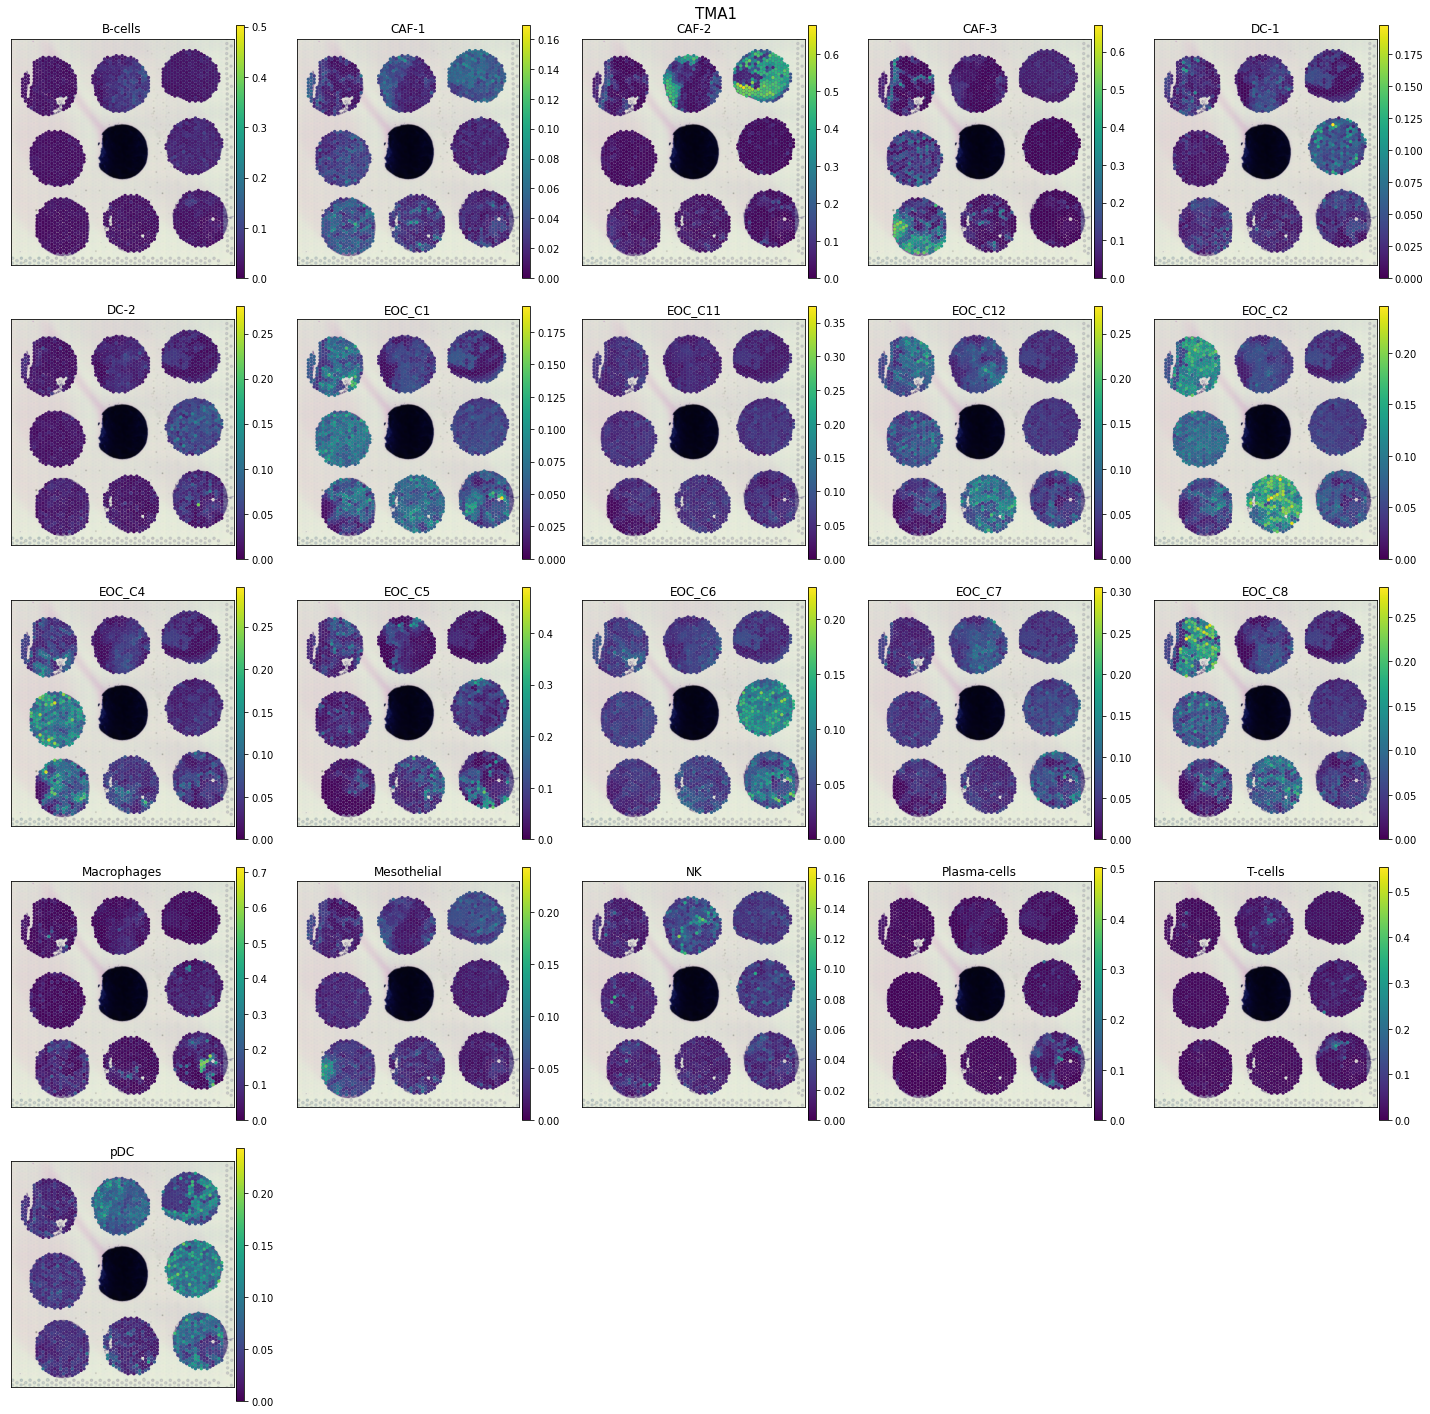

In [27]:
cell_types = sorted(list(adata.uns['mod']['factor_names']))
plates = adata.obs.filter(['plate'],axis=1).drop_duplicates().sort_values('plate')['plate']
lims = pd.DataFrame({'max':adata.obs.filter(cell_types , axis =1).max()})
for plate in plates:

    fig, axs = plt.subplots(5, 5, figsize=(20, 20))
    axs = axs.flatten()

    for i, ct in enumerate(cell_types):

        sc.pl.spatial(
                adata[adata.obs.plate == plate, :],
                img_key='lowres',
                library_id= 'HC-' + plate,
                color=ct,
                size=1.5,
                legend_loc=None,
                show=False,
                vmin = 0,
                vmax = lims.loc[ct,'max'],
                # vmin = (lims.loc[pathway, 'llim']*1.1),
                # vmax = (lims.loc[pathway, 'ulim']*1.1),
                # color_map = 'BrBG',
                # vcenter = 0,
                ax=axs[i]
            )
        axs[i].set_title(ct)
        axs[i].set_facecolor('#D9D9D9')
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')

    for ax in axs[len(cell_types):]:
        ax.set_axis_off()

    plt.suptitle(plate, fontsize = 15)
    plt.tight_layout()
    # output_pdf.savefig(fig)
    # plt.close()

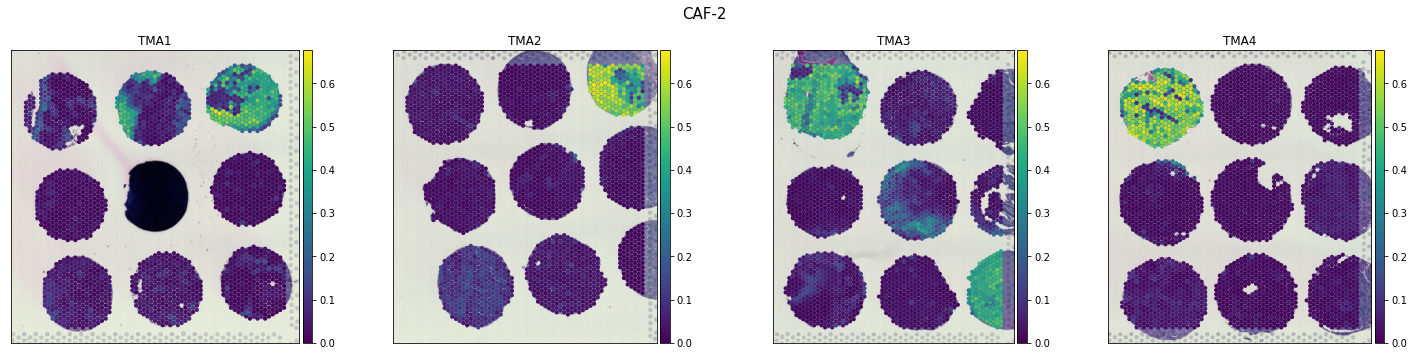

In [32]:
for ct in cell_types[2:3]:

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    axs = axs.flatten()

    for i, plate in enumerate(plates):

        sc.pl.spatial(
                adata[adata.obs.plate == plate, :],
                img_key='lowres',
                library_id= 'HC-' + plate,
                color=ct,
                size=1.5,
                legend_loc=None,
                show=False,
                vmin = 0,
                vmax = lims.loc[ct,'max'],
                # vmin = (lims.loc[pathway, 'llim']*1.1),
                # vmax = (lims.loc[pathway, 'ulim']*1.1),
                # color_map = 'BrBG',
                # vcenter = 0,
                ax=axs[i]
            )
        axs[i].set_title(plate)
        axs[i].set_facecolor('#D9D9D9')
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')

    # for ax in axs[len(cell_types):]:
    #     ax.set_axis_off()

    plt.suptitle(ct, fontsize = 15)
    plt.tight_layout()
    # output_pdf.savefig(fig)
    # plt.close()

In [ ]:
for library in acts.obs.filter(['library_id','mouse'], axis = 1).drop_duplicates().sort_values('library_id')['library_id']:
    #[os.path.basename(os.path.dirname(sample)) for sample in sample_paths]
    fig, axs = plt.subplots(4, 4, figsize=(23, 20))
    axs = axs.flatten()

    ad = acts[acts.obs.library_id == library, :]#.copy()

    for i, pathway in enumerate(acts.var.index.values):

        sc.pl.spatial(
            ad,
            img_key=None,
            library_id=library,
            color=pathway,
            size=1.5,
            legend_loc=None,
            show=False,
            # vmin = 0,
            # vmax = 17589,
            vmin = (lims.loc[pathway, 'llim']*1.1),
            vmax = (lims.loc[pathway, 'ulim']*1.1),
            color_map = 'BrBG',
            vcenter = 0,
            ax=axs[i],
        )
        axs[i].set_title(pathway)
        axs[i].set_facecolor('#D9D9D9')
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')

    for ax in axs[lims.shape[0]:]:
        ax.set_axis_off()

    plt.suptitle(ad.obs['mouse'][0], fontsize = 15)
    plt.tight_layout()
    output_pdf.savefig(fig)
    plt.close()